In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Setup Completed')

Setup Completed


In [10]:
df = pd.read_csv(r'C:\Users\SH2\Downloads\Diwali Sales Data.csv', encoding='unicode_escape')

In [11]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [12]:
df.shape

(11251, 15)

In [14]:
df.drop(columns=['Status','unnamed1'],axis = 1,inplace =True)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [17]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [20]:
# drop null values
df.dropna(inplace=True)

In [23]:
df[['Age','Orders','Amount']].describe().round(2)

,Age,Orders,Amount
count,11239.00,11239.00,11239.00
mean,35.41,2.49,9453.61
std,12.75,1.11,5222.36
min,12.00,1.00,188.00
25%,27.00,2.00,5443.00
50%,33.00,2.00,8109.00
75%,43.00,3.00,12675.00
max,92.00,4.00,23952.00


## Explotary Data Analysis

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

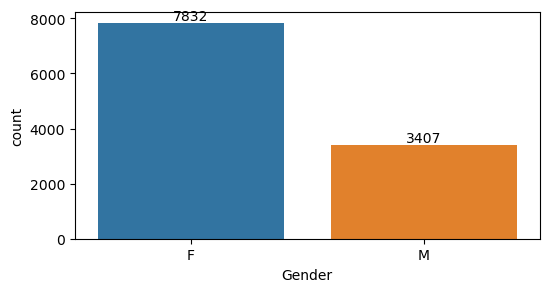

In [31]:
plt.figure(figsize=(6,3),dpi=100)
ax = sns.countplot(x='Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [33]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

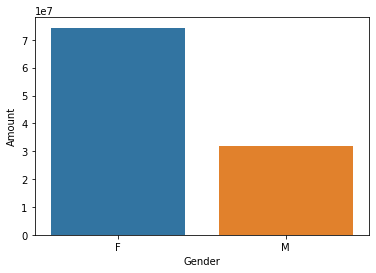

In [35]:
df1 = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False)
sns.barplot(x='Gender',y ='Amount',data = df1)

* from the above graph we can see that most of the buyers are Females and even purchasing power of females is greater that men

### Age

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

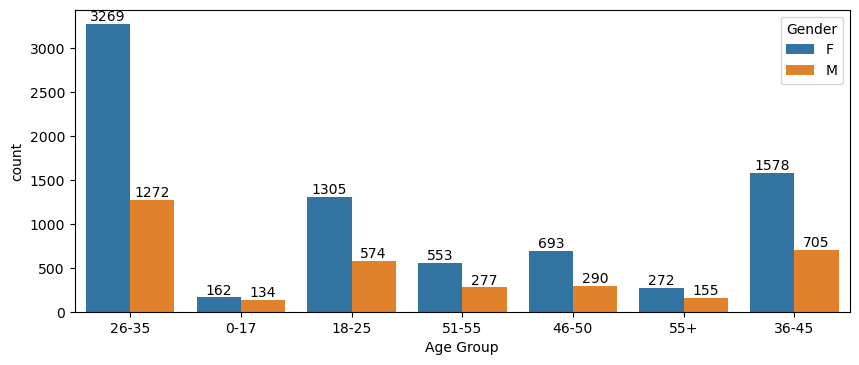

In [42]:
plt.figure(figsize=(10,4),dpi=100)
df2 = sns.countplot(data = df,x='Age Group',hue='Gender')
for bars in df2.containers:
    df2.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

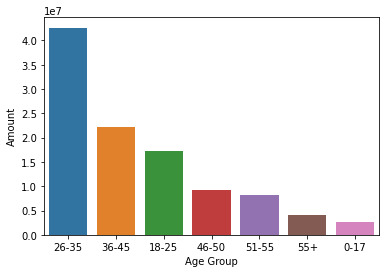

In [43]:
df3 = df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False)
sns.barplot(x='Age Group',y ='Amount',data = df3)

In [46]:
df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending =False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


Text(0, 0.5, 'Orders')

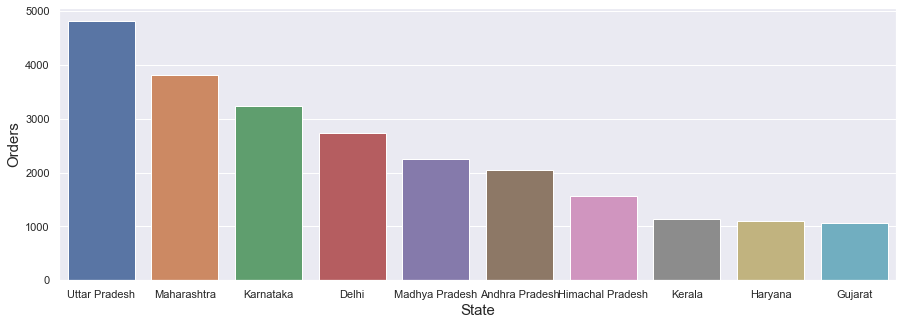

In [54]:
stats_orders = df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending =False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data =stats_orders)
plt.xlabel('State',size=15)
plt.ylabel('Orders',size=15)

Text(0, 0.5, 'Amount')

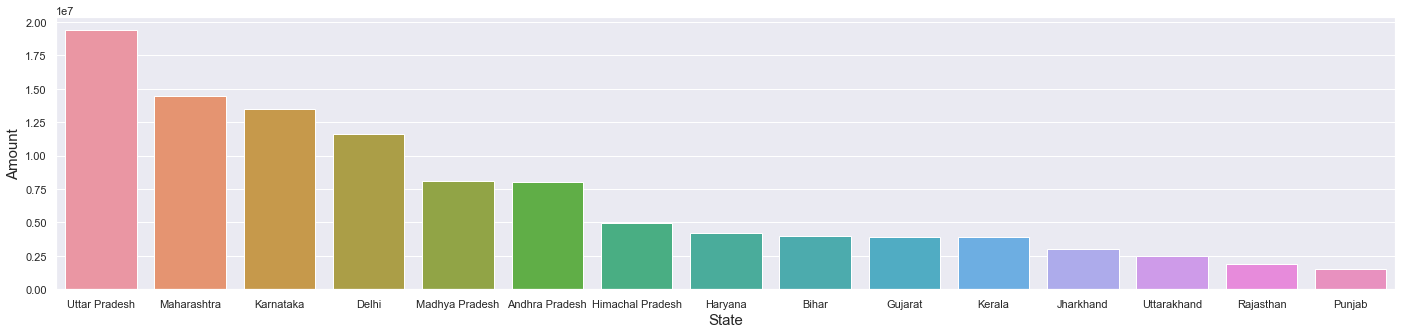

In [59]:
stats_amount = df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False).head(15)
sns.set(rc={'figure.figsize':(24,5)})
sns.barplot(x='State',y='Amount',data =stats_amount)
plt.xlabel('State',size=15)
plt.ylabel('Amount',size=15)

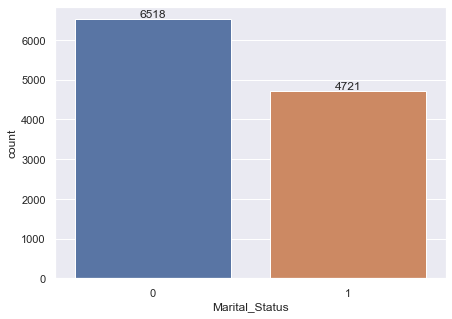

In [64]:
ax =sns.countplot(x='Marital_Status',data = df)
sns.set(rc = {'figure.figsize':(2,5)})
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Amount')

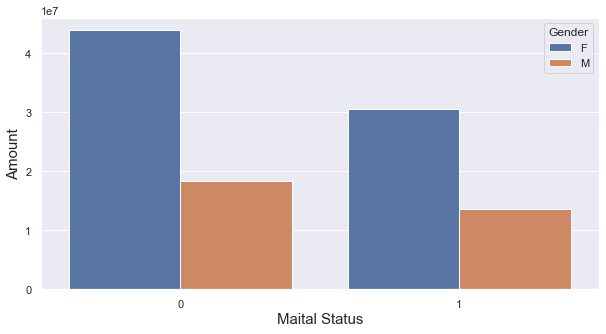

In [72]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending =False).head(15)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Marital_Status',y='Amount',data =stats_amount,hue='Gender')
plt.xlabel('Maital Status',size=15)
plt.ylabel('Amount',size=15)

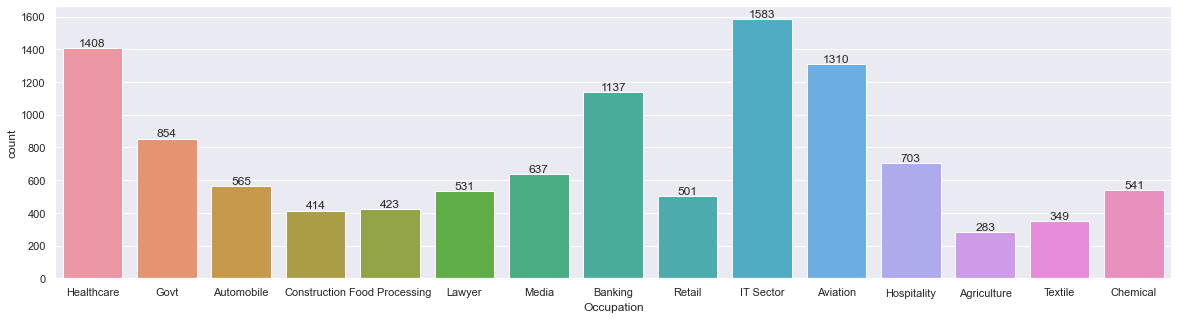

In [77]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x='Occupation',data =df)
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

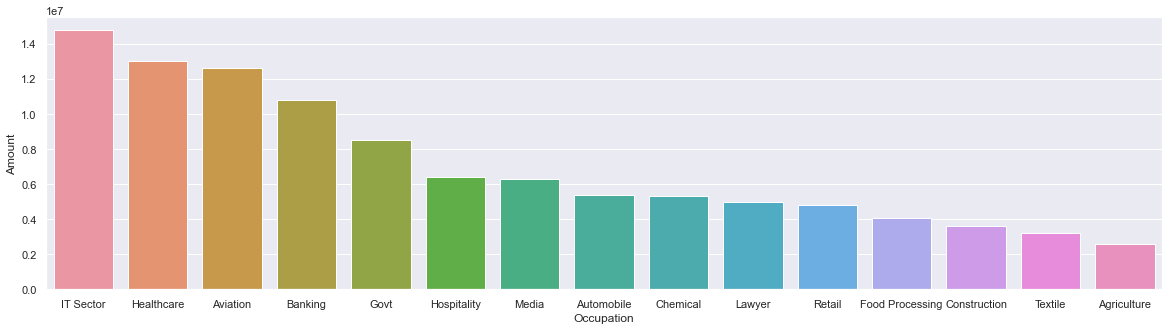

In [79]:
sales_stat = df.groupby(['Occupation'],as_index =False)['Amount'].sum().sort_values(by='Amount',ascending =False)
sns.barplot(x='Occupation',y='Amount',data =sales_stat)

In [80]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

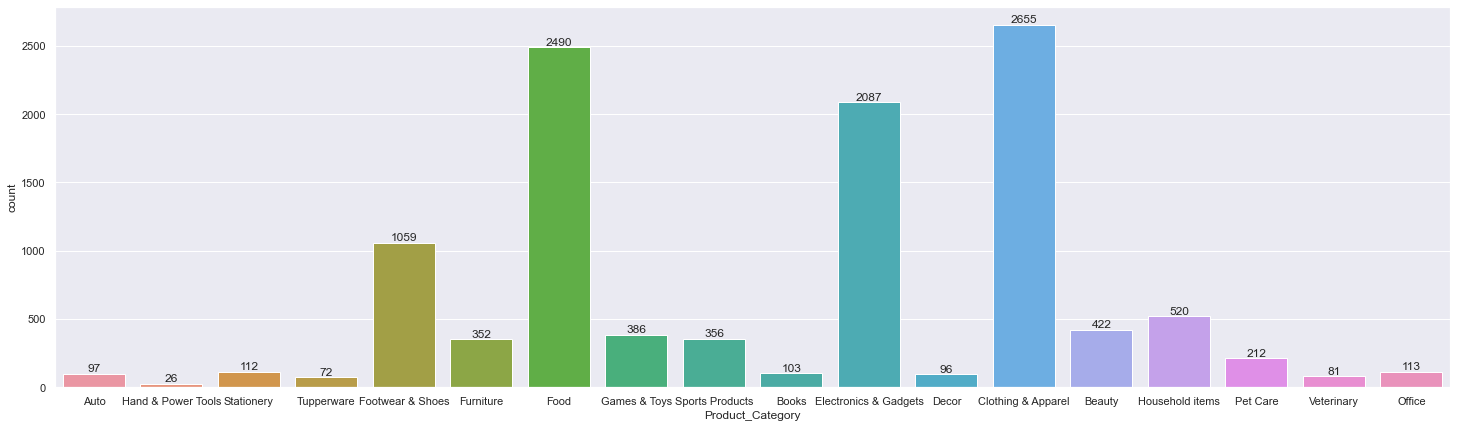

In [83]:
sns.set(rc={'figure.figsize':(25,7)})
ax = sns.countplot(x='Product_Category',data =df)
for bars in ax.containers:
    ax.bar_label(bars)

Text(0, 0.5, 'Amount')

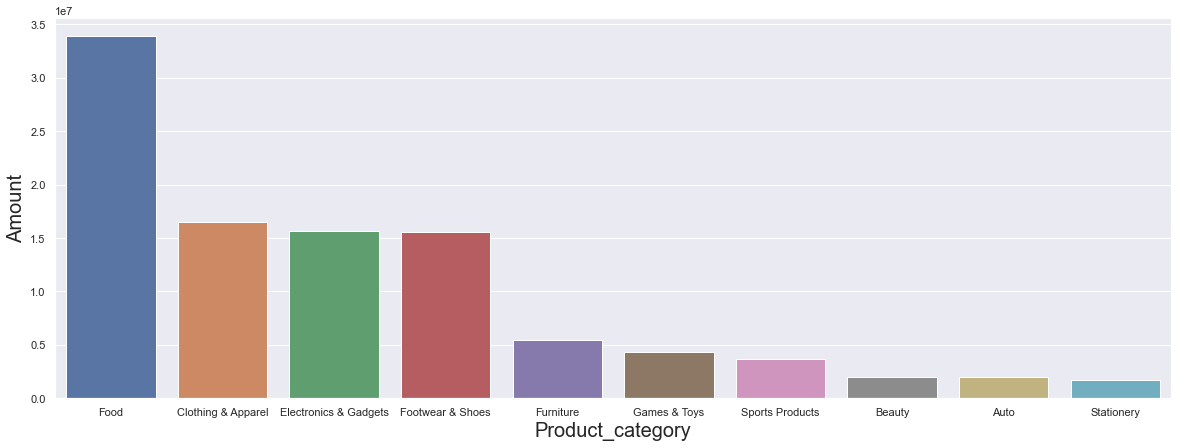

In [89]:
sns.set(rc={'figure.figsize':(20,7)})
sales_stat = df.groupby(['Product_Category'],as_index =False)['Amount'].sum().sort_values(by='Amount',ascending =False).head(10)
sns.barplot(x='Product_Category',y='Amount',data =sales_stat)
plt.xlabel('Product_category',size=20)
plt.ylabel('Amount',size=20)

<AxesSubplot:>

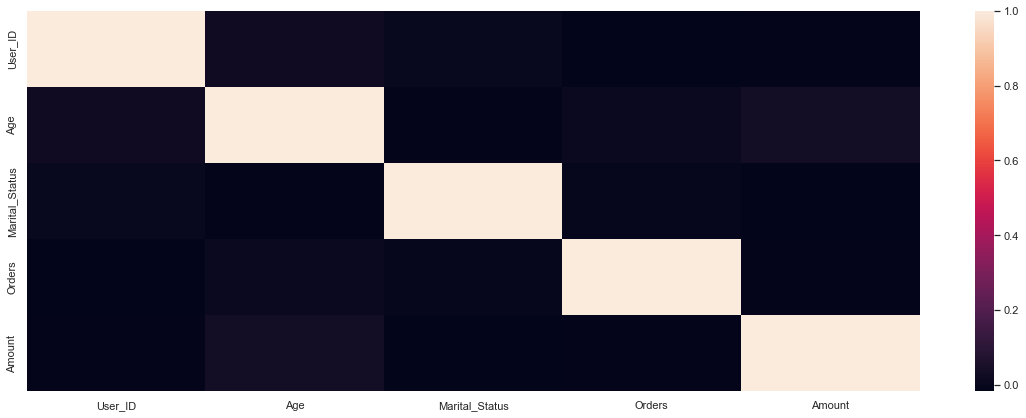

In [92]:
sns.heatmap(df.corr())

In [91]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]